<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/IntegerProgramming_machine_parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


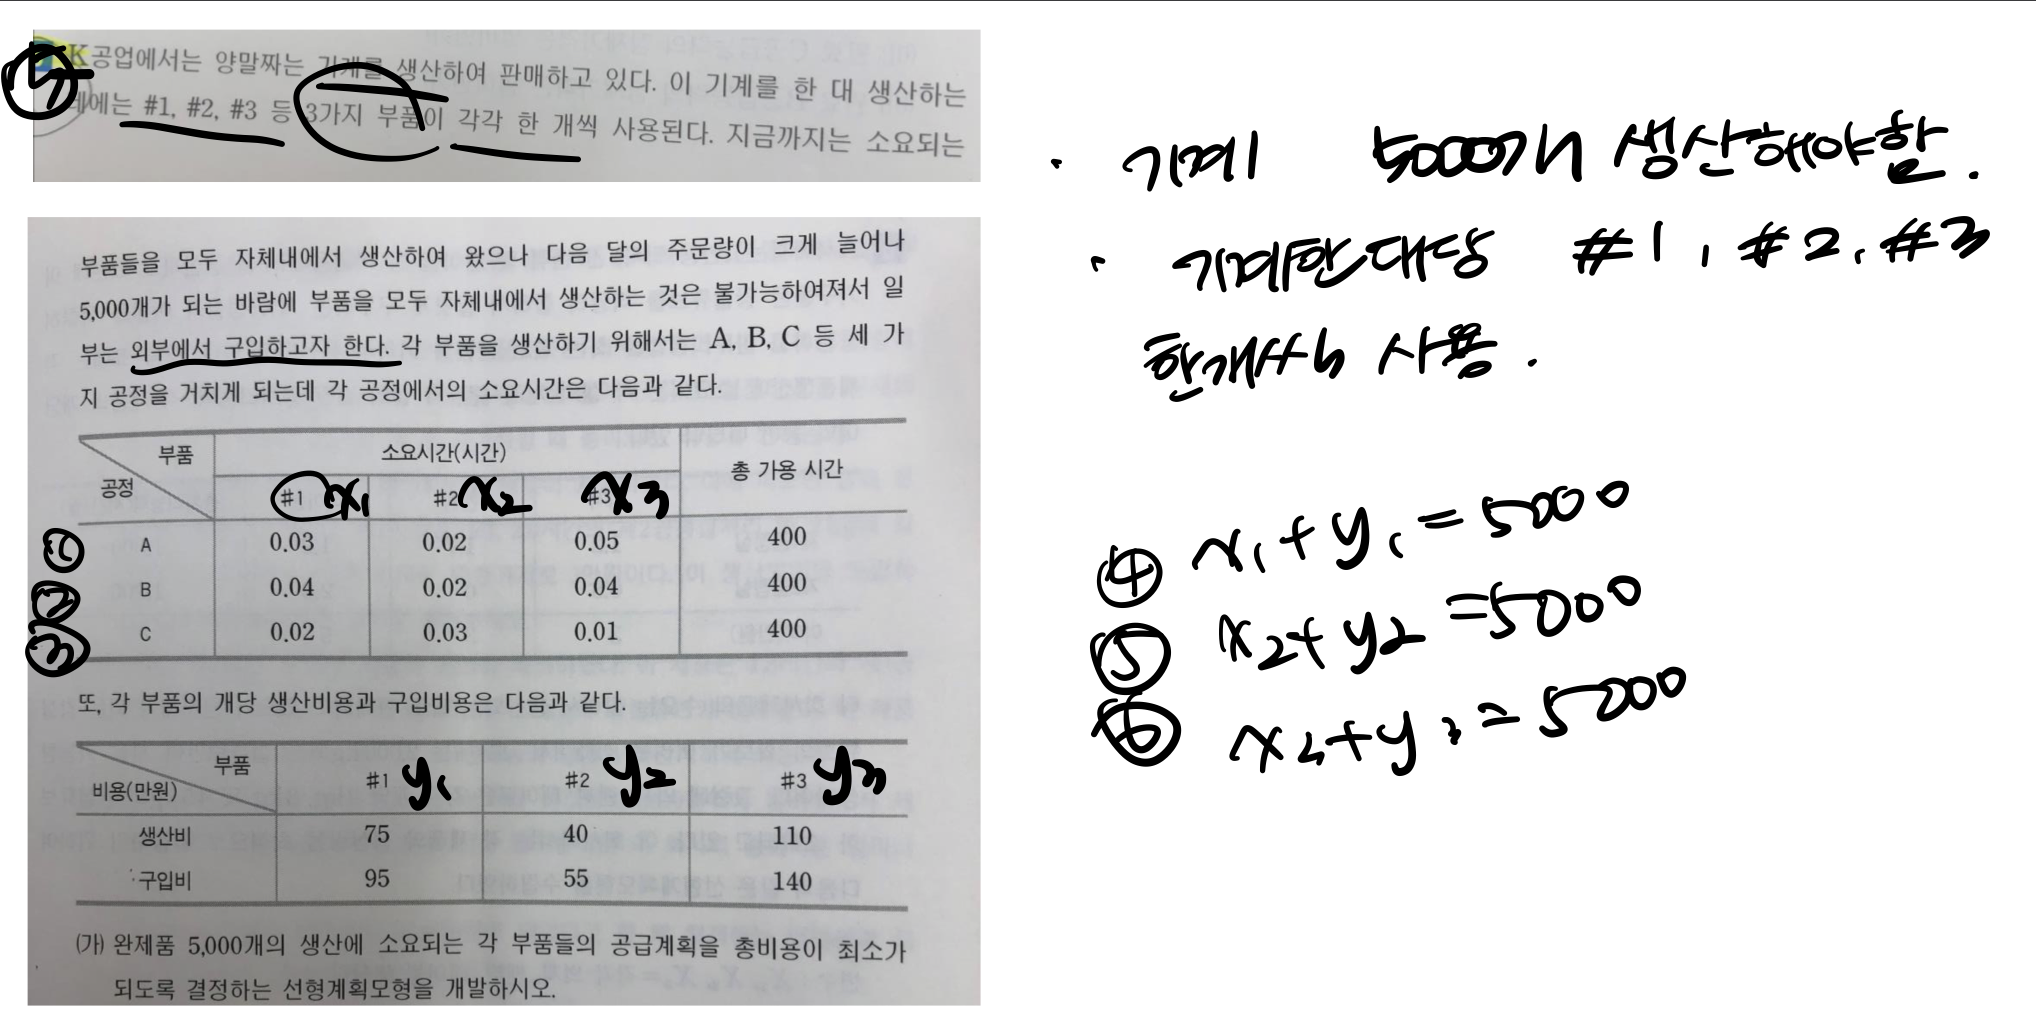

In [2]:
from pulp import *
model =LpProblem(name ='Furniture', sense =LpMaximize)

x_num_variables =3
x_variables =[LpVariable(name=f'x{i}', lowBound =0, cat ='Integer') for i in range(1,x_num_variables+1)]

y_num_variables =3
y_variables =[LpVariable(name=f'y{i}', lowBound =0, cat ='Integer') for i in range(1,y_num_variables+1)]


In [11]:
constraints =[]
constr_coeff =[[0.03, 0.02, 0.05],[0.04, 0.02, 0.04], [0.02, 0.03, 0.01]]
constraints_num =3

for i in range(constraints_num):
  rhs_values =[400,400,400]
  constr_sup = LpConstraint(
      e = LpAffineExpression([(x_variables[j], constr_coeff[i][j]) for j in range(x_num_variables)]),
      sense =LpConstraintLE,
      rhs =rhs_values[i],
      name =f'constraint_sup{i+1}'
  )
  constraints.append(constr_sup)

constr_coeff2 =[[1,1],[1,1],[1,1]]
constraints_num2 =3
for i in range(constraints_num2):
  rhs_values2 =[5000,5000,5000]
  constr_sup2 =LpConstraint(
      e = LpAffineExpression([(x_variables[i], constr_coeff2[i][0]),(y_variables[i], constr_coeff2[i][1]) ]),
      sense = LpConstraintEQ,
      rhs =rhs_values2[i],
      name =f'constraint_sup{i+4}'
  )
  constraints.append(constr_sup2)



In [12]:
print(constraints)

[0.03*x1 + 0.02*x2 + 0.05*x3 + -400 <= 0, 0.04*x1 + 0.02*x2 + 0.04*x3 + -400 <= 0, 0.02*x1 + 0.03*x2 + 0.01*x3 + -400 <= 0, 1*x1 + 1*y1 + -5000 = 0, 1*x2 + 1*y2 + -5000 = 0, 1*x3 + 1*y3 + -5000 = 0]


In [14]:
obj_coeff = [[75,40,110],[95,55,140]]
obj =LpAffineExpression([(y_variables[i], obj_coeff[0][i]) for i in range(y_num_variables)])
obj += LpAffineExpression([(x_variables[i], obj_coeff[1][i]) for i in range(x_num_variables)])
model += obj

In [15]:
for constraint in constraints:
  model += constraint
print(model)

Furniture:
MAXIMIZE
95*x1 + 55*x2 + 140*x3 + 75*y1 + 40*y2 + 110*y3 + 0
SUBJECT TO
constraint_sup1: 0.03 x1 + 0.02 x2 + 0.05 x3 <= 400

constraint_sup2: 0.04 x1 + 0.02 x2 + 0.04 x3 <= 400

constraint_sup3: 0.02 x1 + 0.03 x2 + 0.01 x3 <= 400

constraint_sup4: x1 + y1 = 5000

constraint_sup5: x2 + y2 = 5000

constraint_sup6: x3 + y3 = 5000

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer
0 <= y1 Integer
0 <= y2 Integer
0 <= y3 Integer



In [16]:
model.writeLP('out.txt')
model.solve()

for variable in x_variables:
  print(f'{variable.name} : {variable.value()}')

for variable in y_variables:
  print(f'{variable.name} : {variable.value()}')

x1 : 3750.0
x2 : 5000.0
x3 : 3750.0
y1 : 1250.0
y2 : 0.0
y3 : 1250.0


In [17]:
print(model.objective.value())

1387500.0
